# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

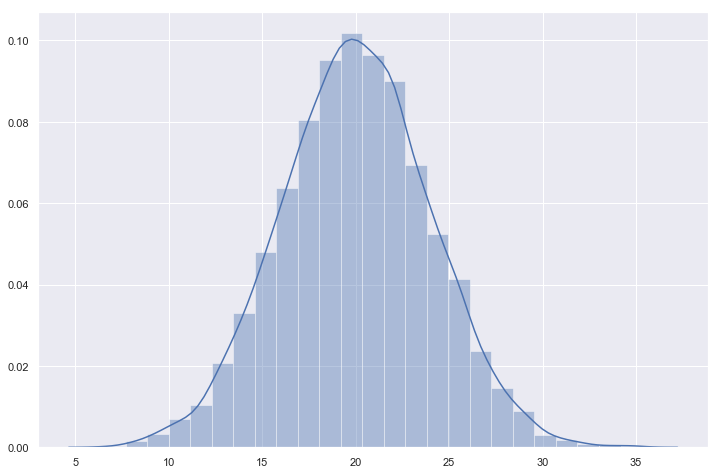

In [17]:
sns.distplot(sct.norm.rvs(20, 4, size=10000), hist=True, bins=25);

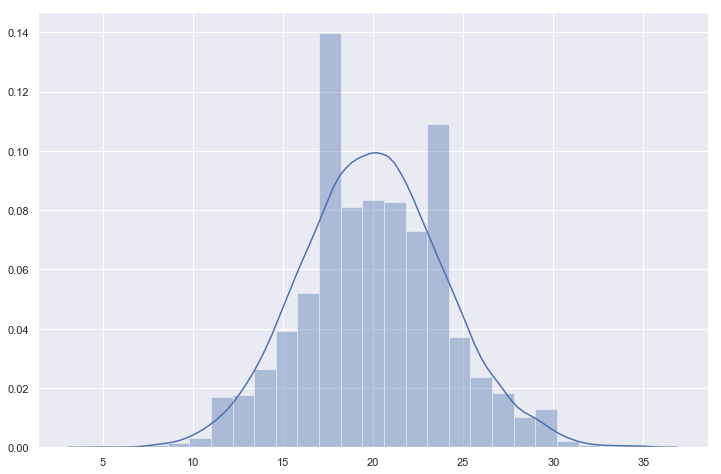

In [13]:
sns.distplot(sct.binom.rvs(100, 0.2, size=10000), hist=True, bins=25);

In [5]:
def q1():
    desc = dataframe.describe()
    t = []

    for i in range(4,7):
        n = desc.iloc[i, 0]
        b = desc.iloc[i, 1]
        t.append((n-b).round(3))
    
    result = tuple(t)
    return result
    pass

In [10]:
result

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude? 

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [8]:
def q2():
    from math import sqrt
    mais_desvio = dataframe['normal'].mean()+dataframe['normal'].std()
    meno_desvio = dataframe['normal'].mean()-dataframe['normal'].std()

    ecdf = ECDF(dataframe['normal'])
    result = ecdf([meno_desvio, mais_desvio])
    return (result[1]-result[0]).round(3)
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [83]:
m_binom = dataframe['binomial'].mean()
v_binom = dataframe['binomial'].var()

m_norm = dataframe['normal'].mean()
v_norm = dataframe['normal'].var()

In [102]:
resol = (m_binom - m_norm, v_binom - v_norm)

(0.106, 0.22)

In [7]:
def q3():
    return tuple(np.round(resol,3))
    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [10]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [11]:
false_mean_profile = stars[['mean_profile', 'target']]

In [12]:
#Filtro do target==0
false_mean_profile.drop(false_mean_profile[false_mean_profile.target == True].index, inplace=True)

C:\Users\Priscila Brito\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
#Padronização
false_pulsar_mean_profile_standardized = (false_mean_profile - false_mean_profile['mean_profile'].mean())/false_mean_profile['mean_profile'].std()

In [14]:
#Função normal
p80 = sct.norm.ppf(0.80, 0,1)
p90 = sct.norm.ppf(0.90, 0, 1)
p95 = sct.norm.ppf(0.95, 0, 1)

In [16]:
#Função Padronizada
prob1 = sct.norm.cdf(p80, false_pulsar_mean_profile_standardized['mean_profile'].mean(), false_pulsar_mean_profile_standardized['mean_profile'].std())
prob2 = sct.norm.cdf(p90, false_pulsar_mean_profile_standardized['mean_profile'].mean(), false_pulsar_mean_profile_standardized['mean_profile'].std())
prob3 = sct.norm.cdf(p95, false_pulsar_mean_profile_standardized['mean_profile'].mean(), false_pulsar_mean_profile_standardized['mean_profile'].std())

In [17]:
ecdf = ECDF(false_pulsar_mean_profile_standardized['mean_profile'])
result = ecdf([p80,p90, p95])

In [18]:
cdf_80 = result[0]
cdf_90 = result[1]
cdf_95 = result[2]

In [19]:
def q4():
    return (cdf_80.round(3), cdf_90.round(3), cdf_95.round(3))
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [20]:
#Padronizado
df = stars[stars['target']==0]['mean_profile']
false_pulsar_mean_profile_standardized = (df - df.mean())/df.std()

In [21]:
#Quartis
desc = false_pulsar_mean_profile_standardized.describe()
q_1 = desc['25%']
q_2 = desc['50%']
q_3 = desc['75%']

In [22]:
false_pulsar_mean_profile_standardized.describe()

count    1.625800e+04
mean     2.420393e-16
std      1.000000e+00
min     -5.685134e+00
25%     -6.471532e-01
50%      3.985947e-02
75%      6.706549e-01
max      4.352157e+00
Name: mean_profile, dtype: float64

In [23]:
#Normal
Q1 = sct.norm.ppf(0.25, 0, 1)
Q2 = sct.norm.ppf(0.50, 0, 1)
Q3 = sct.norm.ppf(0.75, 0, 1)

In [24]:
def q5():
    return ((q_1-Q1).round(3), (float(q_2)-Q2).round(3), (q_3-Q3).round(3))
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.